# HR Analytics - Principal Component Analysis (PCA)

This notebook performs Principal Component Analysis (PCA) on the HR Analytics dataset to reduce dimensionality and explore the data structure.


## 1. Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Load and Preprocess Data


In [2]:
# Load the dataset
try:
    df = pd.read_csv('data/HR_Analytics.csv')
except FileNotFoundError:
    print("Error: The file 'data/HR_Analytics.csv' does not exist.")
    df = pd.DataFrame()

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()


Dataset Shape: (1480, 38)

First few rows:


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [3]:
# Create a copy for preprocessing
df_processed = df.copy()

# Drop irrelevant columns
columns_to_drop = ['EmpID', 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df_processed = df_processed.drop(columns=columns_to_drop, errors='ignore')

print(f"Columns after dropping irrelevant features: {df_processed.shape[1]}")


Columns after dropping irrelevant features: 33


In [4]:
# Encode categorical variables
label_encoders = {}
categorical_columns = df_processed.select_dtypes(include=['object']).columns.tolist()

print(f"Categorical columns to encode: {len(categorical_columns)}")

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le

print("Encoding completed!")


Categorical columns to encode: 10
Encoding completed!


In [5]:
# Handle missing values
numerical_columns = df_processed.select_dtypes(include=[np.number]).columns.tolist()

print("Handling Missing Values...")
print("="*50)

imputer = SimpleImputer(strategy='median')

if df_processed.isnull().sum().sum() > 0:
    df_processed[numerical_columns] = imputer.fit_transform(df_processed[numerical_columns])
    print(f"✓ Imputed missing values using median strategy")
    remaining_missing = df_processed.isnull().sum().sum()
    print(f"✓ Remaining missing values: {remaining_missing}")
else:
    print("No missing values to handle!")

print("\nData preprocessing completed!")


Handling Missing Values...
✓ Imputed missing values using median strategy
✓ Remaining missing values: 0

Data preprocessing completed!


In [6]:
# Prepare features (excluding target for PCA)
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']  # Keep for visualization purposes

print(f"Features shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")


Features shape: (1480, 32)
Number of features: 32


In [7]:
# Feature scaling (Essential for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling completed!")
print(f"Scaled data shape: {X_scaled.shape}")


Feature scaling completed!
Scaled data shape: (1480, 32)


## 3. Principal Component Analysis


In [8]:
# Perform PCA with all components to analyze explained variance
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

print("PCA completed!")
print(f"Original feature space: {X_scaled.shape[1]} dimensions")
print(f"PCA transformed space: {X_pca_full.shape[1]} dimensions")
print(f"\nNumber of components: {len(pca_full.components_)}")


PCA completed!
Original feature space: 32 dimensions
PCA transformed space: 32 dimensions

Number of components: 32


In [9]:
# Explained variance ratio
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Explained Variance by Component:")
print("="*60)
for i in range(min(10, len(explained_variance_ratio))):
    print(f"PC{i+1}: {explained_variance_ratio[i]:.4f} ({explained_variance_ratio[i]*100:.2f}%)")
    print(f"  Cumulative: {cumulative_variance[i]:.4f} ({cumulative_variance[i]*100:.2f}%)")

print(f"\nTotal variance explained by all components: {cumulative_variance[-1]:.4f}")


Explained Variance by Component:
PC1: 0.1767 (17.67%)
  Cumulative: 0.1767 (17.67%)
PC2: 0.0671 (6.71%)
  Cumulative: 0.2438 (24.38%)
PC3: 0.0564 (5.64%)
  Cumulative: 0.3002 (30.02%)
PC4: 0.0540 (5.40%)
  Cumulative: 0.3542 (35.42%)
PC5: 0.0502 (5.02%)
  Cumulative: 0.4044 (40.44%)
PC6: 0.0381 (3.81%)
  Cumulative: 0.4425 (44.25%)
PC7: 0.0360 (3.60%)
  Cumulative: 0.4784 (47.84%)
PC8: 0.0352 (3.52%)
  Cumulative: 0.5136 (51.36%)
PC9: 0.0341 (3.41%)
  Cumulative: 0.5477 (54.77%)
PC10: 0.0334 (3.34%)
  Cumulative: 0.5811 (58.11%)

Total variance explained by all components: 1.0000


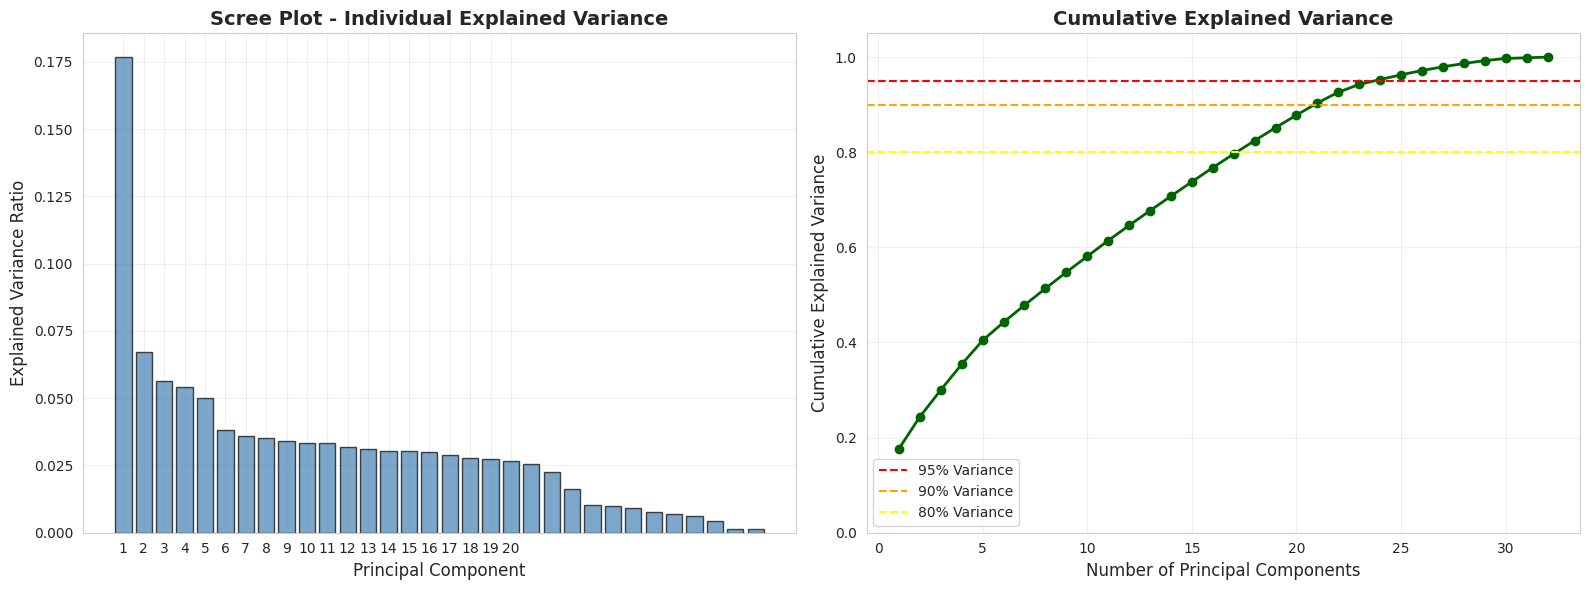

In [10]:
# Scree Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Individual explained variance
axes[0].bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 
            alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('Scree Plot - Individual Explained Variance', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(1, min(21, len(explained_variance_ratio) + 1)))

# Cumulative explained variance
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
             marker='o', linewidth=2, markersize=6, color='darkgreen')
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
axes[1].axhline(y=0.90, color='orange', linestyle='--', label='90% Variance')
axes[1].axhline(y=0.80, color='yellow', linestyle='--', label='80% Variance')
axes[1].set_xlabel('Number of Principal Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 1.05])

plt.tight_layout()
plt.show()


In [11]:
# Find number of components for different variance thresholds
variance_thresholds = [0.80, 0.90, 0.95, 0.99]
print("Number of Components Required for Variance Thresholds:")
print("="*60)
for threshold in variance_thresholds:
    n_components = np.argmax(cumulative_variance >= threshold) + 1
    actual_variance = cumulative_variance[n_components - 1]
    print(f"{threshold*100:.0f}% variance: {n_components} components (actual: {actual_variance*100:.2f}%)")


Number of Components Required for Variance Thresholds:
80% variance: 18 components (actual: 82.44%)
90% variance: 21 components (actual: 90.37%)
95% variance: 24 components (actual: 95.29%)
99% variance: 29 components (actual: 99.26%)


In [12]:
# Component loadings (correlation between original features and principal components)
# Analyze first few principal components
n_components_to_analyze = min(5, len(pca_full.components_))

print(f"\nTop Feature Contributions to First {n_components_to_analyze} Principal Components:")
print("="*80)

for i in range(n_components_to_analyze):
    component = pca_full.components_[i]
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Loading': component,
        'Abs_Loading': np.abs(component)
    }).sort_values('Abs_Loading', ascending=False)
    
    print(f"\nPrincipal Component {i+1} (Explains {explained_variance_ratio[i]*100:.2f}% variance):")
    print("-" * 80)
    print("Top 10 Features:")
    print(feature_importance.head(10)[['Feature', 'Loading']].to_string(index=False))



Top Feature Contributions to First 5 Principal Components:

Principal Component 1 (Explains 17.67% variance):
--------------------------------------------------------------------------------
Top 10 Features:
                Feature   Loading
      TotalWorkingYears  0.378660
               JobLevel  0.360918
          MonthlyIncome  0.356454
             SalarySlab -0.335081
         YearsAtCompany  0.321890
                    Age  0.292510
               AgeGroup  0.283579
     YearsInCurrentRole  0.268537
   YearsWithCurrManager  0.258529
YearsSinceLastPromotion  0.242015

Principal Component 2 (Explains 6.71% variance):
--------------------------------------------------------------------------------
Top 10 Features:
                Feature   Loading
     NumCompaniesWorked  0.386666
     YearsInCurrentRole -0.373717
   YearsWithCurrManager -0.373702
               AgeGroup  0.341140
                    Age  0.335488
         YearsAtCompany -0.333246
YearsSinceLastPromotion -0.2956

## 4. Visualization in Reduced Dimensions


In [13]:
# 2D Visualization using first two principal components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print("2D PCA Transformation:")
print(f"Variance explained by PC1: {pca_2d.explained_variance_ratio_[0]*100:.2f}%")
print(f"Variance explained by PC2: {pca_2d.explained_variance_ratio_[1]*100:.2f}%")
print(f"Total variance explained: {pca_2d.explained_variance_ratio_.sum()*100:.2f}%")


2D PCA Transformation:
Variance explained by PC1: 17.67%
Variance explained by PC2: 6.71%
Total variance explained: 24.38%


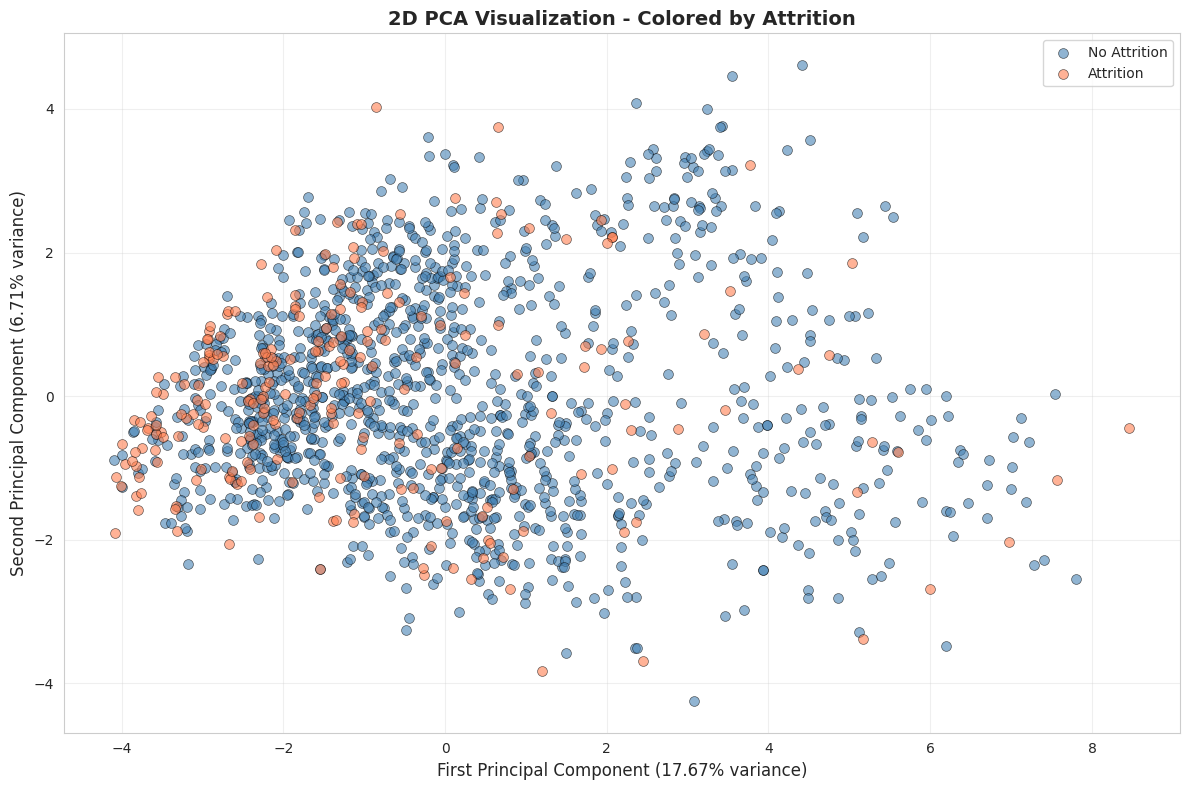

In [14]:
# 2D Scatter plot colored by Attrition
fig, ax = plt.subplots(figsize=(12, 8))

# Map attrition values to labels
attrition_labels = {0: 'No Attrition', 1: 'Attrition'}
colors = {0: 'steelblue', 1: 'coral'}

for label in [0, 1]:
    mask = y == label
    ax.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1], 
               c=colors[label], label=attrition_labels[label], 
               alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

ax.set_xlabel(f'First Principal Component ({pca_2d.explained_variance_ratio_[0]*100:.2f}% variance)', 
              fontsize=12)
ax.set_ylabel(f'Second Principal Component ({pca_2d.explained_variance_ratio_[1]*100:.2f}% variance)', 
              fontsize=12)
ax.set_title('2D PCA Visualization - Colored by Attrition', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [15]:
# 3D Visualization using first three principal components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print("3D PCA Transformation:")
print(f"Variance explained by PC1: {pca_3d.explained_variance_ratio_[0]*100:.2f}%")
print(f"Variance explained by PC2: {pca_3d.explained_variance_ratio_[1]*100:.2f}%")
print(f"Variance explained by PC3: {pca_3d.explained_variance_ratio_[2]*100:.2f}%")
print(f"Total variance explained: {pca_3d.explained_variance_ratio_.sum()*100:.2f}%")


3D PCA Transformation:
Variance explained by PC1: 17.67%
Variance explained by PC2: 6.71%
Variance explained by PC3: 5.64%
Total variance explained: 30.02%


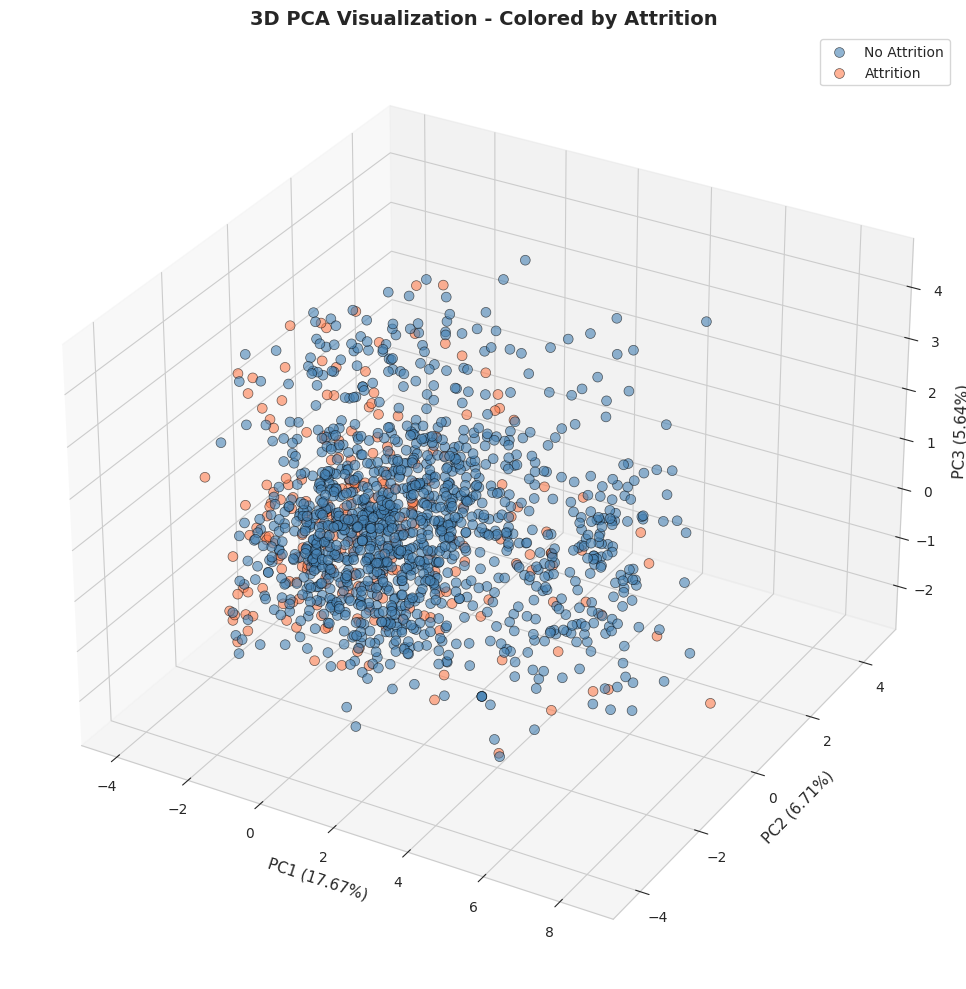

In [16]:
# 3D Scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

for label in [0, 1]:
    mask = y == label
    ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
               c=colors[label], label=attrition_labels[label], 
               alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.2f}%)', fontsize=11)
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.2f}%)', fontsize=11)
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.2f}%)', fontsize=11)
ax.set_title('3D PCA Visualization - Colored by Attrition', fontsize=14, fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()
